In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc,f1_score
from sklearn.tree import DecisionTreeClassifier
import pickle
from IPython.display import FileLink

In [2]:
df = pd.read_csv("C:\\Users\\amalj\\Downloads\\Employee.csv")
df.head()

,Employee ID,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,...,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,8410,31,Male,19,Education,5390,Excellent,Medium,Average,2.0,...,0.0,Mid,Medium,89,No,No,No,Excellent,Medium,Stayed
1,64756,59,Female,4,Media,5534,Poor,High,Low,3.0,...,3.0,Mid,Medium,21,No,No,No,Fair,Low,Stayed
2,30257,24,Female,10,Healthcare,8159,Good,High,Low,0.0,...,3.0,Mid,Medium,74,No,No,No,Poor,Low,Stayed
3,65791,36,Female,7,Education,3989,Good,High,High,1.0,...,2.0,Mid,Small,50,Yes,No,No,Good,Medium,Stayed
4,65026,56,Male,41,Education,4821,Fair,Very High,Average,0.0,...,0.0,Senior,Medium,68,No,No,No,Fair,Medium,Stayed


# Exploratory Data Analysis(EDA)

In [4]:
df.shape

(74498, 24)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Employee ID               74498 non-null  int64  
 1   Age                       74498 non-null  int64  
 2   Gender                    74498 non-null  object 
 3   Years at Company          74498 non-null  int64  
 4   Job Role                  74498 non-null  object 
 5   Monthly Income            74498 non-null  int64  
 6   Work-Life Balance         74494 non-null  object 
 7   Job Satisfaction          74498 non-null  object 
 8   Performance Rating        74494 non-null  object 
 9   Number of Promotions      74493 non-null  float64
 10  Overtime                  74498 non-null  object 
 11  Distance from Home        74498 non-null  int64  
 12  Education Level           74493 non-null  object 
 13  Marital Status            74494 non-null  object 
 14  Number

In [6]:
df.describe

<bound method NDFrame.describe of        Employee ID  Age  Gender  Years at Company    Job Role  Monthly Income  \
0             8410   31    Male                19   Education            5390   
1            64756   59  Female                 4       Media            5534   
2            30257   24  Female                10  Healthcare            8159   
3            65791   36  Female                 7   Education            3989   
4            65026   56    Male                41   Education            4821   
...            ...  ...     ...               ...         ...             ...   
74493        16243   56  Female                42  Healthcare            7830   
74494        47175   30  Female                15   Education            3856   
74495        12409   52    Male                 5   Education            5654   
74496         9554   18    Male                 4   Education            5276   
74497        73042   59  Female                48   Education            37

In [7]:
df.duplicated().sum()

0

In [8]:
df.columns.duplicated().sum()

0

In [9]:
df.nunique()

Employee ID                 74498
Age                            42
Gender                          2
Years at Company               51
Job Role                        5
Monthly Income               9842
Work-Life Balance               4
Job Satisfaction                4
Performance Rating              4
Number of Promotions            5
Overtime                        2
Distance from Home             99
Education Level                 5
Marital Status                  3
Number of Dependents            7
Job Level                       3
Company Size                    3
Company Tenure                127
Remote Work                     2
Leadership Opportunities        2
Innovation Opportunities        2
Company Reputation              4
Employee Recognition            4
Attrition                       2
dtype: int64

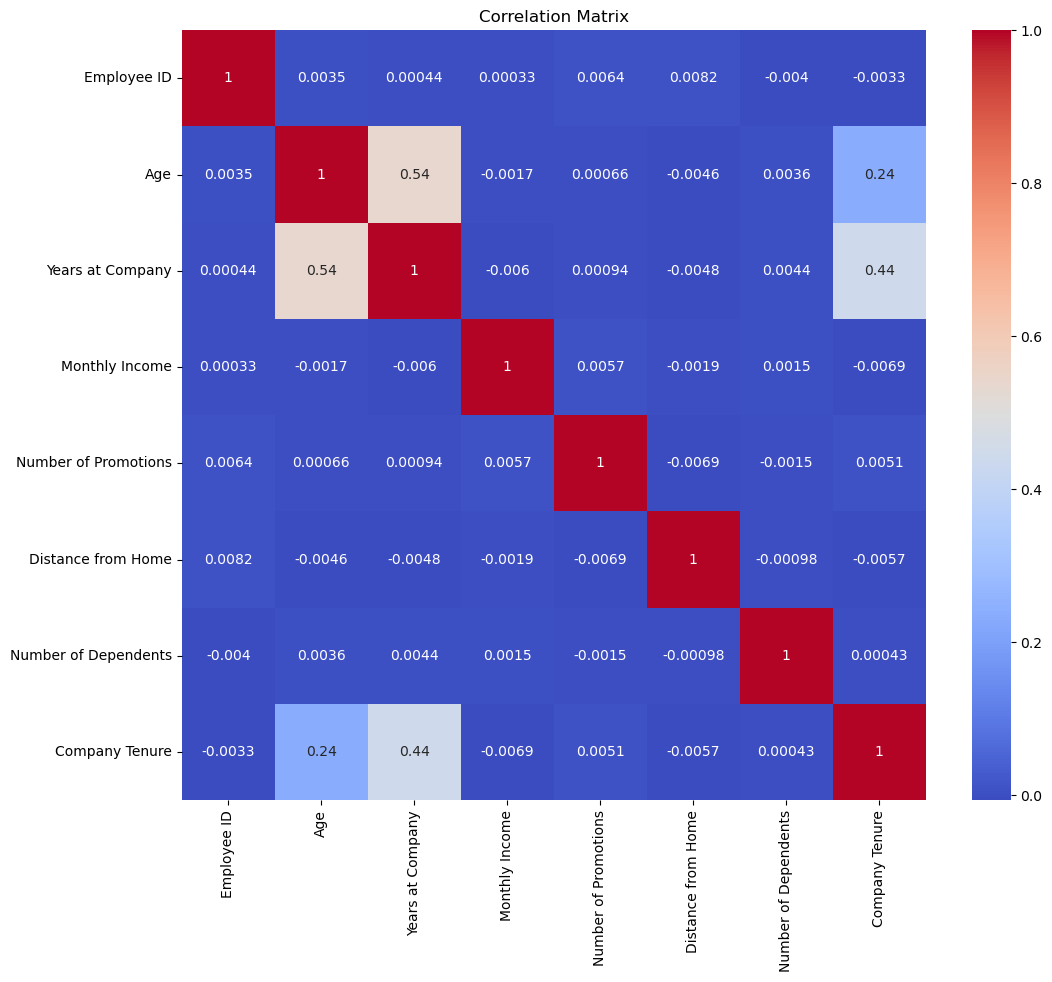

In [10]:
# Correlation Matrix
correlation_matrix = df.select_dtypes(include='number').corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**The correlation matrics shows the relationship between numerical columns. In this there is no significant correlation between factors. The factors Age and Years at company have a slightly correlated.**

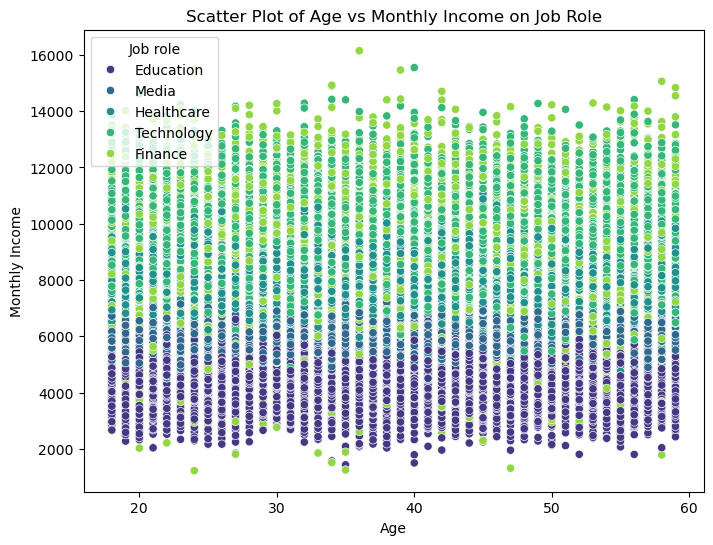

In [12]:
#scatter plot coloured based on Job Role
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Monthly Income', hue='Job Role', data=df, palette='viridis')
plt.title('Scatter Plot of Age vs Monthly Income on Job Role')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.legend(title='Job role')
plt.show()

**This is the scatter plot of Job Role on the Age and Monthly Income. The scatter plot shows that the education job employees have a Monthly income of lower than 10000,the Finance and Technology jobs employees have a higher pay between 8000-16000, Media and Helth care jobs employees have a moderate pay compared to others.**

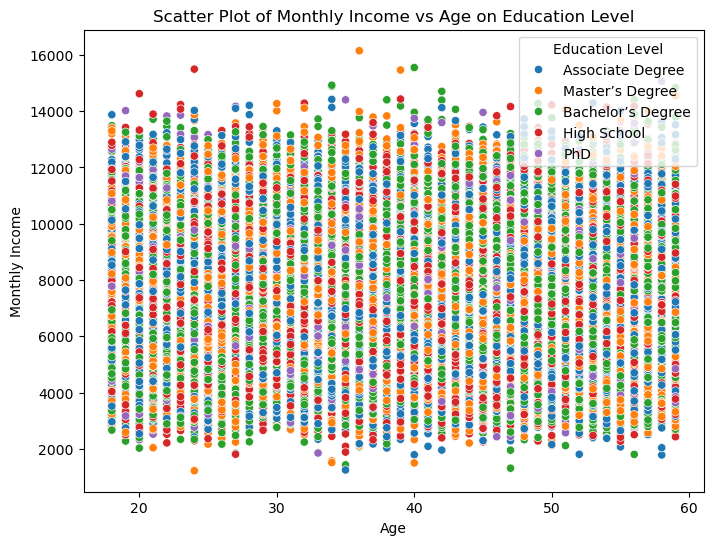

In [14]:
#scatter plot coloured based on Job Role
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Monthly Income', hue='Education Level', data=df)
plt.title('Scatter Plot of Monthly Income vs Age on Education Level')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.legend(title='Education Level')
plt.show()

**The scatter plot shows that there is no common relationship to the education level to the Age and Monthly income. there is no significant pattern on this.**

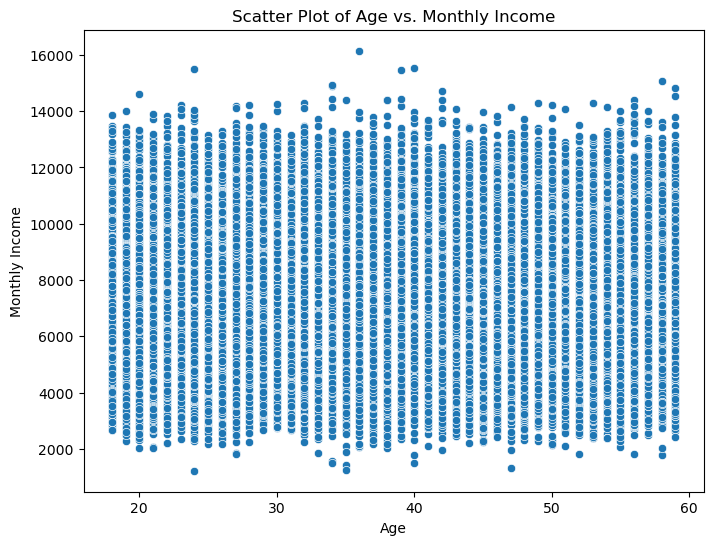

In [16]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Age'], y=df['Monthly Income'])
plt.title('Scatter Plot of Age vs. Monthly Income')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.show()

**This is the scatter plot of Age and Monthly Income. the plot shows there is no significant relation between Age and Monthly income. So we cannot say that when the Age increases Income increases. Here all category of age employees get higher and lower pay.**

<Figure size 800x600 with 0 Axes>

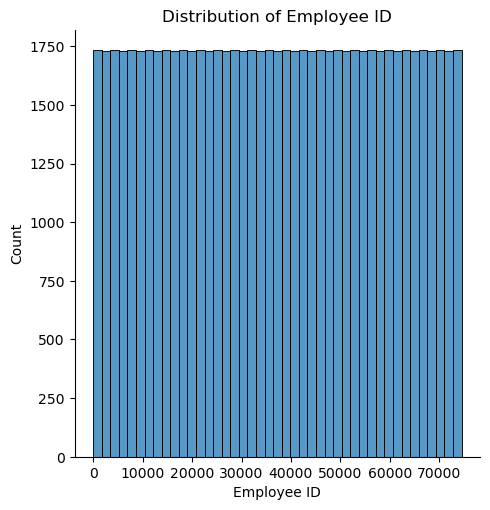

<Figure size 800x600 with 0 Axes>

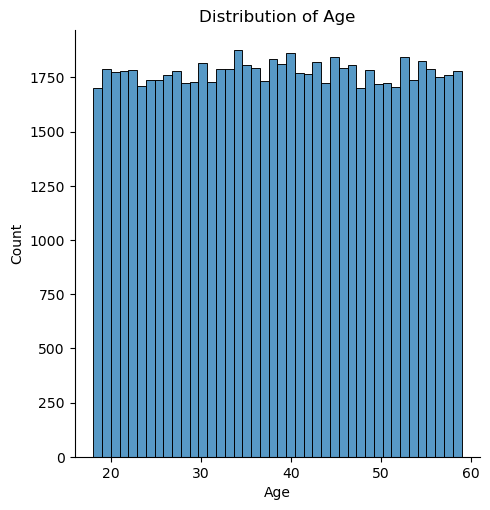

<Figure size 800x600 with 0 Axes>

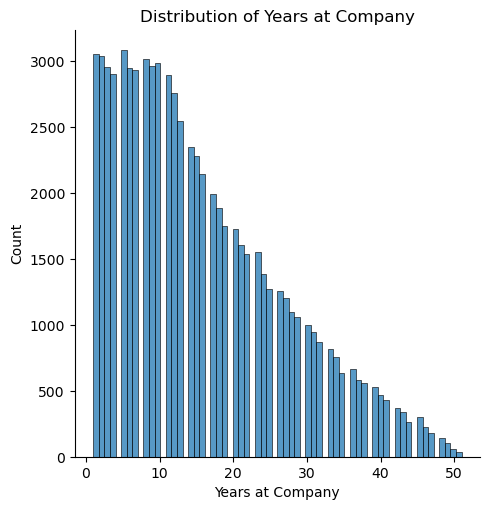

<Figure size 800x600 with 0 Axes>

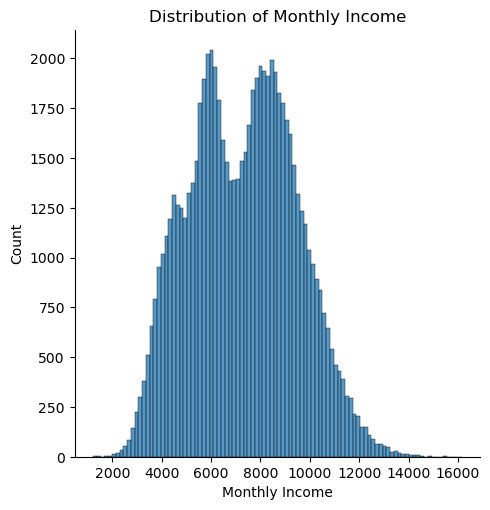

<Figure size 800x600 with 0 Axes>

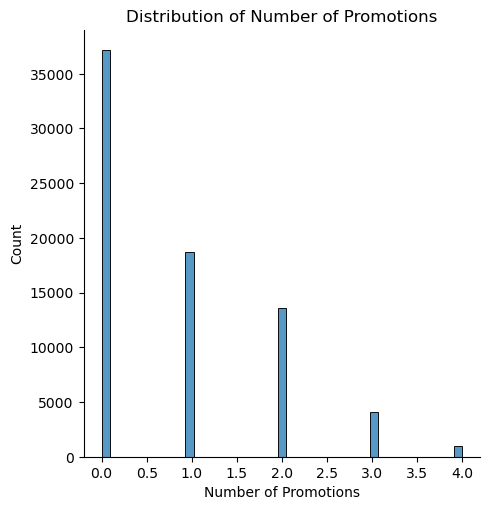

<Figure size 800x600 with 0 Axes>

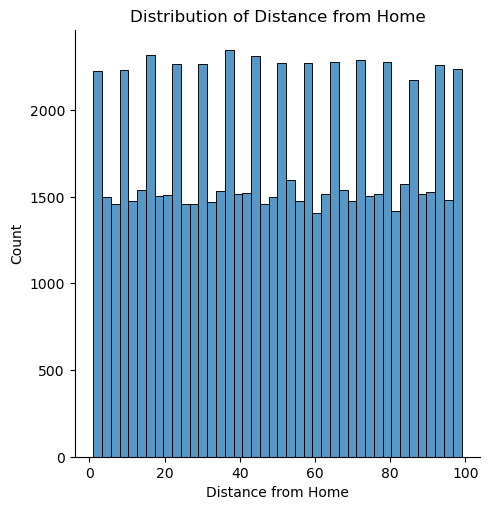

<Figure size 800x600 with 0 Axes>

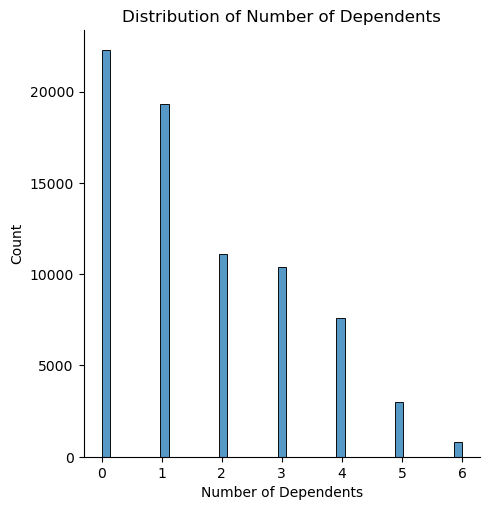

<Figure size 800x600 with 0 Axes>

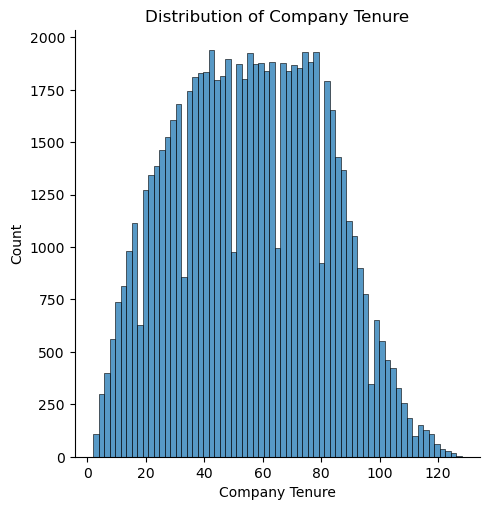

In [18]:
# Plot distribution plots for numerical columns
for col in df.select_dtypes(include='number'):
  plt.figure(figsize=(8, 6))
  sns.displot(df[col])
  plt.xlabel(col)
  plt.title(f'Distribution of {col}')
  plt.show()

# Preprocessing

In [20]:
df.isna().sum()

Employee ID                 0
Age                         0
Gender                      0
Years at Company            0
Job Role                    0
Monthly Income              0
Work-Life Balance           4
Job Satisfaction            0
Performance Rating          4
Number of Promotions        5
Overtime                    0
Distance from Home          0
Education Level             5
Marital Status              4
Number of Dependents        6
Job Level                   5
Company Size                2
Company Tenure              0
Remote Work                 3
Leadership Opportunities    0
Innovation Opportunities    0
Company Reputation          0
Employee Recognition        2
Attrition                   0
dtype: int64

In [21]:
# Filling Null values with Median.
for col in df.select_dtypes(include='number'):
    df[col] = df[col].fillna(df[col].median())


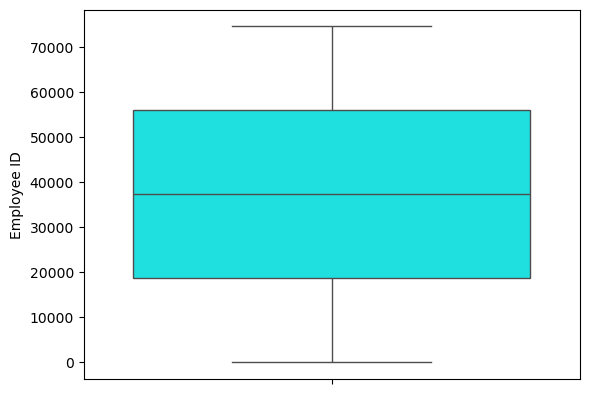

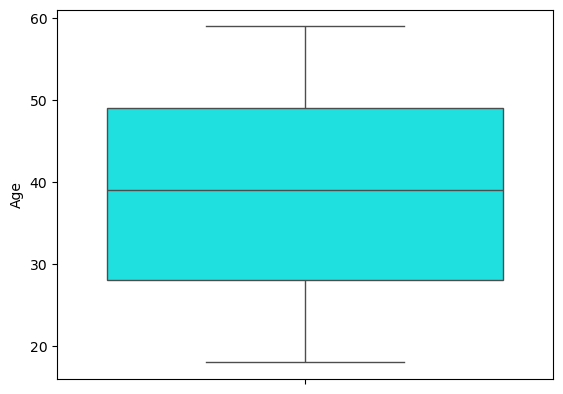

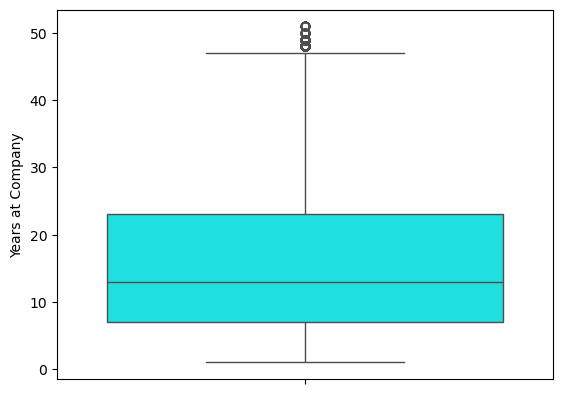

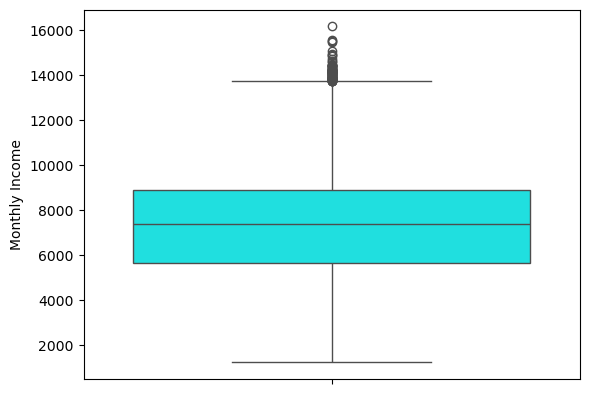

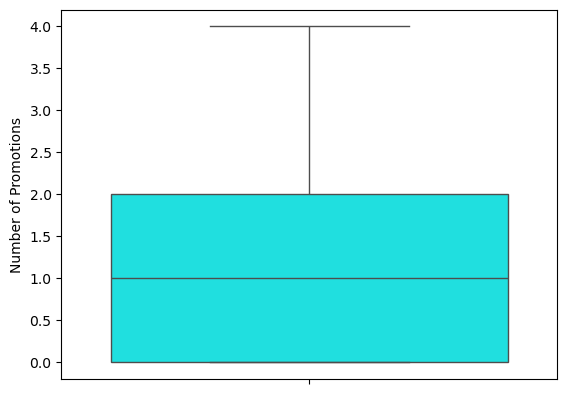

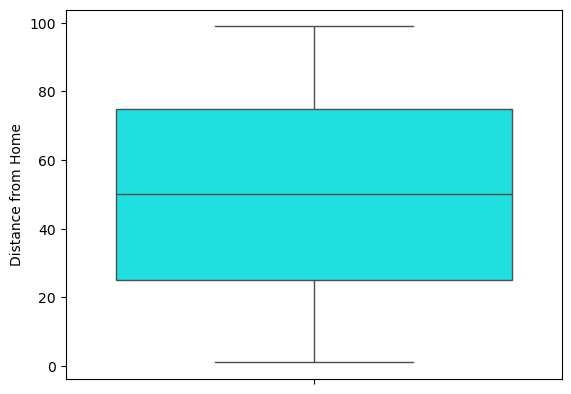

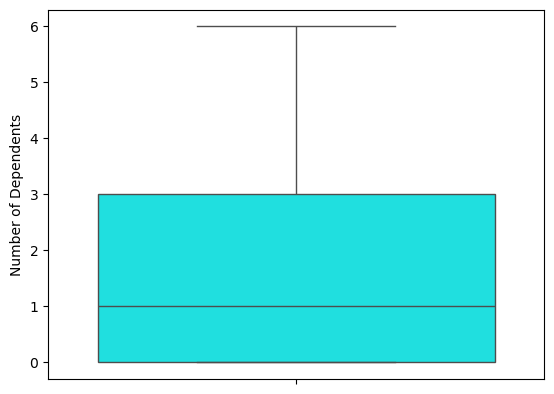

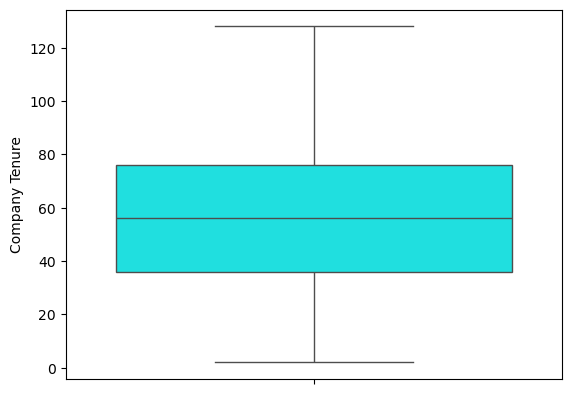

In [22]:
#Outliers
for i in df.select_dtypes(include=np.number):
    sns.boxplot(df[i], color='cyan')
    plt.show()

In [23]:
# Clipping 
for col in df.select_dtypes(include='number'):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lb = Q1 - 1.5 * IQR
    ub = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lb, ub)

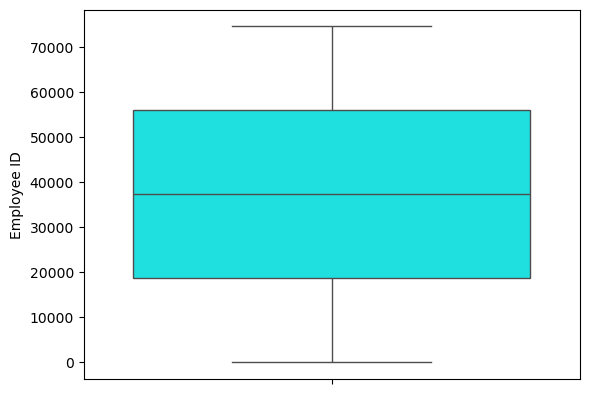

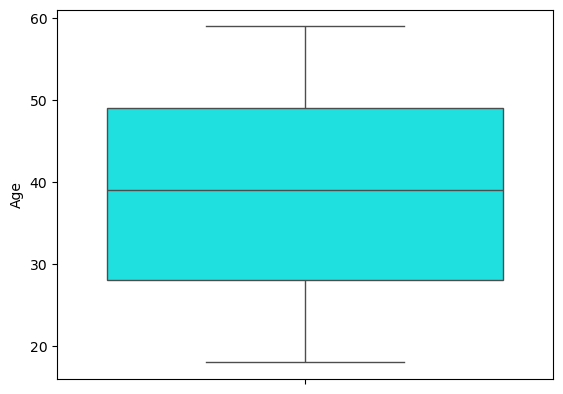

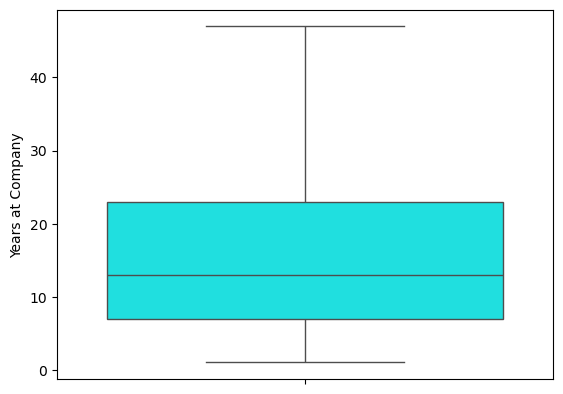

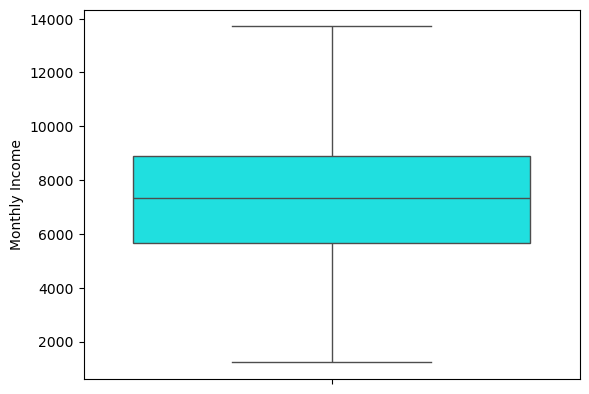

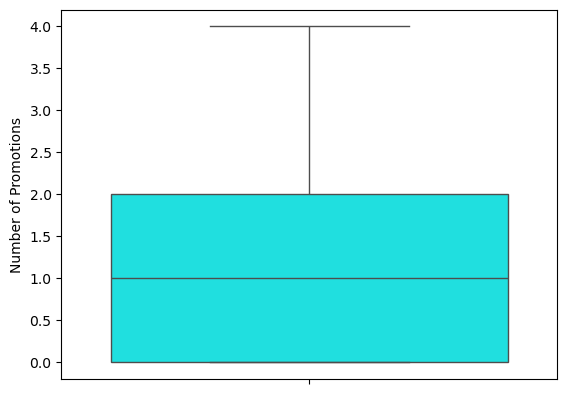

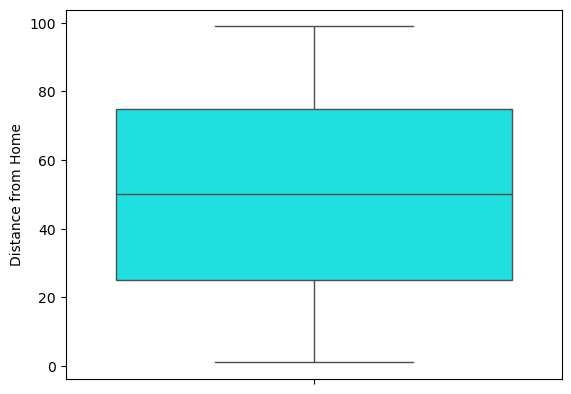

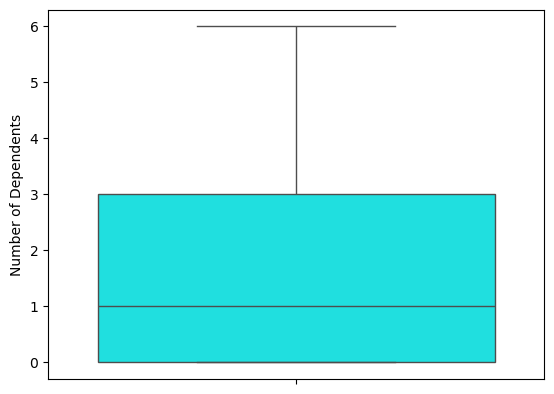

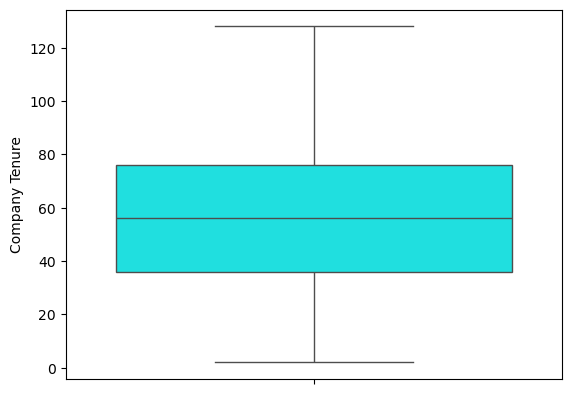

In [24]:
#Outliers
for i in df.select_dtypes(include=np.number):
    sns.boxplot(df[i], color='cyan')
    plt.show()

In [25]:
df= df.drop('Employee ID', axis=1)
df= df.drop('Distance from Home', axis=1)
df= df.drop('Number of Dependents', axis=1)
df= df.drop('Overtime', axis=1)
df= df.drop('Marital Status', axis=1)
df= df.drop('Company Size', axis=1)

# Scaling

In [31]:
#MinMax Scaler
scaler = MinMaxScaler()

for column in ['Age', 'Years at Company', 'Monthly Income','Number of Promotions','Company Tenure']:
  df[column] = scaler.fit_transform(df[['Age', 'Years at Company', 'Monthly Income','Number of Promotions']])
print(df.head(3))

        Age  Gender  Years at Company    Job Role  Monthly Income  \
0  0.317073    Male          0.317073   Education        0.317073   
1  1.000000  Female          1.000000       Media        1.000000   
2  0.146341  Female          0.146341  Healthcare        0.146341   

  Work-Life Balance Job Satisfaction Performance Rating  Number of Promotions  \
0         Excellent           Medium            Average              0.317073   
1              Poor             High                Low              1.000000   
2              Good             High                Low              0.146341   

     Education Level Job Level  Company Tenure Remote Work  \
0   Associate Degree       Mid        0.317073          No   
1    Master’s Degree       Mid        1.000000          No   
2  Bachelor’s Degree       Mid        0.146341          No   

  Leadership Opportunities Innovation Opportunities Company Reputation  \
0                       No                       No          Excellent   
1

# Encoding

In [36]:
#LabelEncoder
le = LabelEncoder()

for column in ['Gender', 'Job Role', 'Work-Life Balance','Job Satisfaction','Performance Rating', 'Education Level','Job Level','Remote Work','Leadership Opportunities','Innovation Opportunities','Company Reputation','Employee Recognition']:
  df[column] = le.fit_transform(df[column])
print(df.head(3))

        Age  Gender  Years at Company  Job Role  Monthly Income  \
0  0.317073       1          0.317073         0        0.317073   
1  1.000000       0          1.000000         3        1.000000   
2  0.146341       0          0.146341         2        0.146341   

   Work-Life Balance  Job Satisfaction  Performance Rating  \
0                  0                 2                   0   
1                  3                 0                   3   
2                  2                 0                   3   

   Number of Promotions  Education Level  Job Level  Company Tenure  \
0              0.317073                0          1        0.317073   
1              1.000000                3          1        1.000000   
2              0.146341                1          1        0.146341   

   Remote Work  Leadership Opportunities  Innovation Opportunities  \
0            0                         0                         0   
1            0                         0                 

In [38]:
df.head(3)

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Education Level,Job Level,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,0.317073,1,0.317073,0,0.317073,0,2,0,0.317073,0,1,0.317073,0,0,0,0,2,Stayed
1,1.000000,0,1.000000,3,1.000000,3,0,3,1.000000,3,1,1.000000,0,0,0,1,1,Stayed
2,0.146341,0,0.146341,2,0.146341,2,0,3,0.146341,1,1,0.146341,0,0,0,3,1,Stayed


# Train Test Split

In [41]:
X =df.drop(columns=['Attrition'])
y = df['Attrition']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(59598, 17)
(59598,)
(14900, 17)
(14900,)


# Modeling

### Logistic Regression

In [49]:
# Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [50]:
y_predlr= model_lr.predict(X_test)

In [51]:
#Classification Report
print(classification_report(y_test,y_predlr))

              precision    recall  f1-score   support

        Left       0.67      0.66      0.66      7096
      Stayed       0.69      0.71      0.70      7804

    accuracy                           0.68     14900
   macro avg       0.68      0.68      0.68     14900
weighted avg       0.68      0.68      0.68     14900



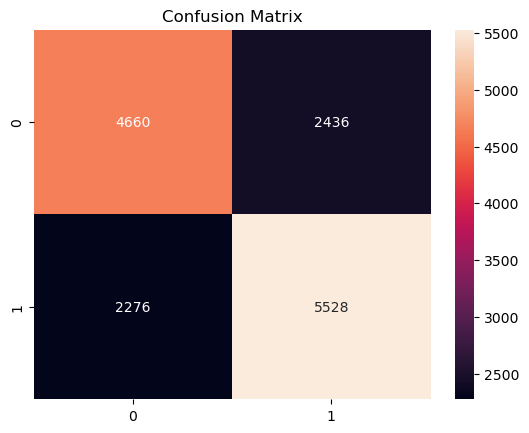

In [54]:
#confusion matrix
conf_mat =confusion_matrix(y_test,y_predlr)
plt.figure()
sns.heatmap(conf_mat,annot=True,fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [55]:
filename = 'logic_reg_trained_model.pkl'

with open(filename, 'wb') as file:
    pickle.dump(model_lr, file)

FileLink(filename)

C:\Users\amalj\Downloads\logic_reg_trained_model.pkl

**Logistic Regression model gives a accuracy f1 score of 0.68, which is moderately a better score. A higher f1 score indicates the model trained is good. 
The confusion matrix shows the number of correct predictions: true positives and true negatives. It also shows the model errors: false positives are “false alarms,” and false negatives are missed cases.
here the FP rate is 2268 and the FN rate is 2425.
A low FP rate signifies that the classifier is a good one. so the model is comparitively good**


### Random forest Classification

In [58]:
# Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
y_pred_rf= model_rf.predict(X_test)

In [61]:
# Classification Report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

        Left       0.66      0.65      0.66      7096
      Stayed       0.69      0.70      0.69      7804

    accuracy                           0.68     14900
   macro avg       0.68      0.68      0.68     14900
weighted avg       0.68      0.68      0.68     14900



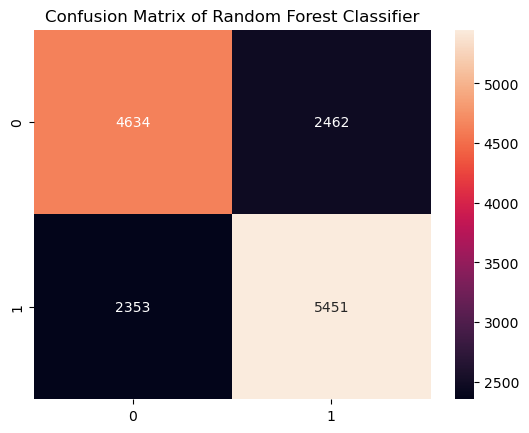

In [62]:
# Confusion Matrix
conf_mat_rf = confusion_matrix(y_test,y_pred_rf)
plt.figure()
sns.heatmap(conf_mat_rf,annot=True,fmt='d')
plt.title("Confusion Matrix of Random Forest Classifier")
plt.show()

In [65]:
filename = 'random_forest_trained_model.pkl'

with open(filename, 'wb') as file:
    pickle.dump(model_rf, file)

FileLink(filename)

C:\Users\amalj\Downloads\random_forest_trained_model.pkl

**Random Forest Classifier model gives a accuracy f1 score of 0.68, which is moderately a better score. A higher f1 score indicates the model trained is good. 
Here the FP rate is 2360 and the FN rate is 2396.
A low FP rate signifies that the classifier is a good one.**


### Decision Tree classifier

In [68]:
# Decision Tree 
model_dt =DecisionTreeClassifier()
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [69]:
y_pred_dt = model_dt.predict(X_test)

In [70]:
# Classification report
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

        Left       0.60      0.60      0.60      7096
      Stayed       0.64      0.64      0.64      7804

    accuracy                           0.62     14900
   macro avg       0.62      0.62      0.62     14900
weighted avg       0.62      0.62      0.62     14900



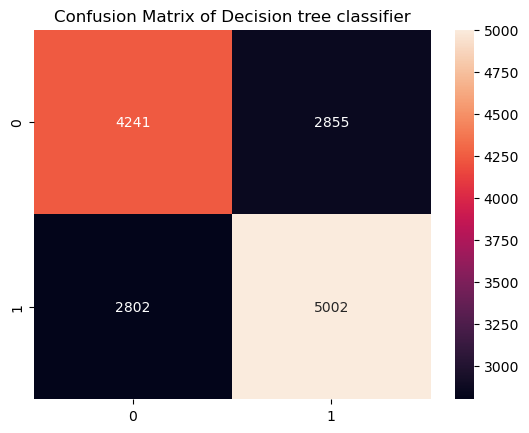

In [71]:
# Confusion Matrix
conf_mat_dt = confusion_matrix(y_test,y_pred_dt)
plt.figure()
sns.heatmap(conf_mat_dt,annot=True,fmt='d')
plt.title("Confusion Matrix of Decision tree classifier")
plt.show()

In [72]:
filename = 'decision_tree_trained_model.pkl'

with open(filename, 'wb') as file:
    pickle.dump(model_dt, file)

FileLink(filename)

C:\Users\amalj\Downloads\decision_tree_trained_model.pkl

**Decision Tree Classifier model gives a accuracy f1 score of 0.61, which is not so good score. A higher f1 score indicates the model trained is good. 
Here the FP rate is 2856 and the FN rate is 2893.
A low FP rate signifies that the classifier is a good one.**

#Conclusion

## Here we have trained three models Logistic regression, random forest classifier and Decision tree classifier. from the models the accuracy score of each models are:LogisticRegression :- 0.68 ,RandomForestClassifier :- 0.68, DecisionTreeClassifier :- 0.61. so we can take both Logistic Regression or Random Forest classifier.